# <font color='red'>TME ROBOTIQUE ET APPRENTISSAGE</font>
# <font color='red'>Stratégies d'Evolution et Robotique Autonome</font>

<font color="red">Version étudiant 2023</font>

<b><font color='green'>GROUPES 1 et 2</font></b>

*mise à jour: 9/3/2023*

Ce notebook doit être exécuté dans [Google Colab](colab.research.google.com/) (mais vous pouvez aussi l'utiliser avec Jupyter Lab)

Vous devez déposer votre travail sur Moodle:
* déposer votre notebook, avec le nom de fichier *obligatoirement* au format suivant: **RA_NOM1_NOM2.ipynb**. 
* toutes les cellules exécutées
* des graphes et un commentaire *court* lorsque cela est demandé
* la partie B est à faire en autonomie
* la partie C ne sera pas évaluée

*Le sujet est à faire en binome.*

# COMPLETEZ LES CHAMPS CI-DESSOUS AVEC NOM/PRENOM/CARTE_ETU:

* Étudiant 1: **_Nom_ _Prénom_ _noCarteEtudiant_**
* Étudiant 2: **_Nom_ _Prénom_ _noCarteEtudiant_**



# <font color='orange'>PARTIE A: optimisation dans un espace de recherche continu</font>

# Importation des librairies et définition des fonctions utiles pour la partie A

Remarque: *Il est nécessaire d'exécuter ces cellules une seule fois. En cas de redémarrage du noyau, il faut relancer ces cellules. Il n'est pas nécessaire de regarder le code de ces cellules, elles servent seulement de soutien à la partie A.*

In [2]:
from datetime import datetime
from datetime import date
#import importlib # une seule fois
import sys
import random
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-09 14:07:18 GMT
OK.


In [ ]:
#!pip install numpy scipy matplotlib pandas sympy nose
!pip install deap
!pip install cma
#!pip install --user pygame

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")

In [3]:
# plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
from scipy.optimize import minimize


def plot_results(my_func, my_points, min_x=-30, max_x=30, min_y=-30, max_y=30, nbx=100, nby=100, title="Title"):
    """Plots a 2D function with a heatmap and the points given as argument are plotted on top of it

    Plots a 2D function with a heatmap and the points given as argument are plotted on top of it:
    :param my_func: the function to plot on the background
    :param my_points: the points to plot
    :param min_x: min value of x
    :param max_x: max value of x
    :param min_y: min value of y
    :param max_y: max value of y
    :param nbx: number of my_func samples on the X-axis
    :param nby: number of my_func samples on the Y-axis
    :param title: title of the figure
    """
    X = np.linspace(min_x, max_x, num=nbx)
    Y = np.linspace(min_y, max_y, num=nby)
    Z=np.zeros((nbx,nby),dtype=np.double)
    for i in range(nbx):
        for j in range(nby):
            Z[i][j]=my_func([X[i],Y[j]])
    fig,ax=plt.subplots(figsize=(5,5))
    ax.set_xlim(min_x,max_x)
    ax.set_ylim(min_y,max_y)
    ax.imshow(Z, cmap='hot', interpolation='nearest',extent=(min_x,max_x,min_y,max_y))
    
    #print("Points: "+str(my_points))
    x=[]
    y=[]
    for p in my_points:
        x.append(p[0])
        y.append(p[1])

    ax.plot(x,y,".")
    ax.set_title(title)
    plt.show()

def plot_violin(res):
    """ Makes a violin plot of the results provided in the argument

    Makes a violin plot of the results provided in the argument.
    :param res: dictionary of the results to plot. The key is the name and the data is a vector of performance values.
    """
    fig,ax=plt.subplots(figsize=(5,5))
    data=[]
    labels=[]
    for k in res.keys():
        data.append(res[k])
        labels.append(k)
    ax.violinplot(data,
                   showmeans=False,
                   showmedians=True)
    ax.set_title('Violin plot')
    # adding horizontal grid lines
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(data))])
    ax.set_xlabel('Optimization methods')
    ax.set_ylabel('Best value found')

    # add x-tick labels
    plt.setp(ax, xticks=[y + 1 for y in range(len(data))],
        xticklabels=labels)
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()
  
print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-09 14:07:20 GMT
OK.


In [4]:
# myEvalFn
# requires: CMA

import sys
import cma
import cma.purecma as purecma
from deap import benchmarks

def ackley(x):
    return benchmarks.ackley(x)[0]

def sphere(x):
    return benchmarks.sphere(x)[0]

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]


#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-09 14:07:23 GMT
OK.


In [5]:
# myEvalFn

def ackley(x):
    return benchmarks.ackley(x)[0]

def sphere(x):
    return benchmarks.sphere(x)[0]

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]

init_pSG = False # WARNING: pSG.initAll() should NEVER be called BEFORE calling explore(.)
def explore(x):  # NOTE: display should be false whenever an optimiser is called
    global init_pSG
    if init_pSG == False:
        pSG.initAll()
        init_pSG = True
    return -pSG.evaluate(x)   # remember: we minimise!

#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-09 14:07:25 GMT
OK.


---

# Exercice A-0: recherche au hasard

Etudiez le code ci-dessous. Il s'agit d'un algorithme de recherche aléatoire, qui explore l'environnement naïvement et stocke le meilleur score obtenu jusqu'ici. Vous testerez cette bibliothèque sur la fonction de Sphere, Ackley, puis Rastrigin, en dimension 2 pour l'instant. Observez l'évolution de la population. 

Dans les exercices suivants, vous pouvez utiliser ce code comme point de départ en le modifiant librement.

Remarque: la variable *dimensions* définit le nombre de dimensions du problème. Dans l'exemple ci-dessous, le nombre de dimensions est fixé arbitrairement à 16. Notez que la fonction *plot_results* n'affiche que les deux premières dimensions, d'ou le fait que le meilleur individu peut s'approcher ou s'éloigner du centre (ou se trouve la meilleure solution). Vous pouvez aussi tester ce code (ainsi que ceux que vous écrirez) avec 2 dimensions seulement. La convergence sera plus rapide (voire très rapide), mais le rendu sera plus fidèle à l'exploration de l'espace de recherche, puisqu'entièrement représenté.

In [ ]:
# fourni a titre d'exemple, ne pas modifier -- reprendre ce code et le modifier dans les cellules suivantes pour répondre aux questions.

def launch_random(individual, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(individual)
    i=0
    j=0
    parentFit = ma_func(individual)
    bestFit = parentFit
    bestIt = 0
    while i<nbeval:
        child = np.random.uniform(-20,20,len(individual))
        childFit = ma_func(child)
        if childFit <= parentFit:
            parentFit = childFit
            parent = np.copy(child)
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = i
        j+=1
        solutions = np.array([parent])
        if display and ((j<10) or (j%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(j)) # on projette uniquement sur les deux premières dimensions.
        i+=1
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit

dimensions = 16 # défini le nombre de dimensions de l'espace de recherche (remarque: seules les deux premières sont affichées avec la commande plot_results) 
launch_random([20]*dimensions,ma_func=sphere) # un vecteur de {dimensions} paramètres, dont on arbitrairement décidé que le point de départ était le vecteur {20,20,20,...,20}, ce qui correpond à une solution peu optimale.

print ("Terminé.")


_inclure ici quelques commentaires sur vos résultats_

 La solution optimale est 517.1743603489633 dans un espace à 16 dimensions après 750 itérations. Cela montre que l'algorithme est capable de trouver une solution acceptable dans un espace de recherche à haute dimension. Cependant, le temps d'exécution de l'algorithme était assez long puisqu'il a effectué 10 000 itérations, même si la solution optimale a été trouvée après seulement 356 itérations. Le nombre d'itérations pourrait peut-être être optimisé en utilisant une stratégie d'arrêt précoce.

---

# Exercice A-1: algorithme (1+1)-ES

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma fixe.

Vous testerez cet algorithme sur les mêmes fonctions que précédemment. Vous tracerez (comme montré à la question précédente) l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.

A noter que si la valeur de sigma peut influer significativement l'optimisation, l'initialisation compte aussi. Par exemple, si la solution initialement proposée se trouve dans une région ressemblant à un plateau (ie. plusieurs solutions proches obtiennent le même score), il sera difficile d'améliorer cette solution puisqu'une recherche locale s'apparentera à une marche aléatoire.

A noter aussi qu'en lançant plusieurs fois l'algorithme, vous obtiendrez des résultats différent à la fois en vitesse de convergence et de performance. Nous reviendrons sur ce point plus tard.

In [25]:

def launch_oneplusone(individual, sigma, nbeval=10000, display=True, ma_func=sphere,plot = True):
  # A compléter
  parent = np.array(individual)
  i=0
  j=0
  parentFit = ma_func(individual)
  bestFit = parentFit
  bestIt = 0
  while i<nbeval:
      child = parent + sigma * np.random.normal(size=len(individual))
      childFit = ma_func(child)
      if childFit <= parentFit:
          parentFit = childFit
          parent = np.copy(child)
          if bestFit > parentFit:
              bestFit = parentFit
              bestIt = i
      j+=1
      solutions = np.array([parent])
      if plot and display and ((j<10) or (j%100==0)):
          plot_results(ma_func,solutions, title="Gen %d"%(j)) # on projette uniquement sur les deux premières dimensions.
      i+=1
  print ("Best fit",bestFit,"at iteration",bestIt)
  return bestFit, bestIt
  

print ("Terminé.")


Terminé.


Best fit 0.043959829102915376 at iteration 4348
Best fit 0.8983855971831511 at iteration 8949
Best fit 2.2452452176124056 at iteration 2318
Best fit 75.13503106476341 at iteration 1339
Best fit 450.4924889976453 at iteration 1123
Best fit 2402.6065166158824 at iteration 694
Best fit 3737.3144866086036 at iteration 9168
Terminé.


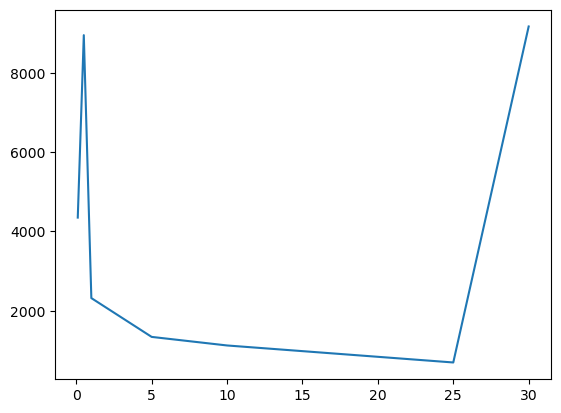

In [26]:
dimensions = 16
point_initial = [20]*dimensions
sigmas = [0.1,0.5,1,5,10,25,30]
iteration = []
for sigma in sigmas:
    #print("sigma:",sigma)
    _,bestIt = launch_oneplusone(point_initial, sigma=sigma, ma_func=sphere,plot = False)
    iteration.append(bestIt)
plt.plot(sigmas,iteration)

print("Terminé.")

Lorsque sigma est petit, le degré de perturbation est faible et la solution nouvellement générée est susceptible d'être très proche de la solution optimale actuelle, ce qui peut amener l'algorithme à tomber dans un optimum local et rendre difficile la recherche d'une meilleure solution. Par conséquent, lorsque sigma est petit, la convergence de l'algorithme peut être lente.

Lorsque sigma est grand, le degré de perturbation est plus important et la nouvelle solution générée peut être éloignée de la solution optimale actuelle. Cela peut augmenter la capacité d'exploration de l'espace de recherche, mais l'algorithme peut aussi se perdre dans l'espace de recherche et ne pas converger vers la solution optimale. Par conséquent, lorsque sigma est grand, l'algorithme peut nécessiter davantage d'itérations pour trouver la solution optimale.


---

# Exercice A-2: algorithme (1+1)-ES, règle des 1/5e

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma suivant la règle des 1/5e.

Vous testerez cette algorithme sur les mêmes fonction que précédemment. Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.

In [66]:
def launch_ESonefifthRule(individual, sigma, nbeval=10000, ma_func=sphere):
  # A compléter  
  parent = np.array(individual)
  i=0
  j=0
  parentFit = ma_func(individual)
  bestFit = parentFit
  bestIt = 0
  while i<nbeval:
    child = parent + sigma * np.random.normal(size=len(individual))
    childFit = ma_func(child)
    if childFit <= parentFit:
      parentFit = childFit
      parent = np.copy(child)
      sigma = 2 * sigma
      if bestFit > parentFit:
        bestFit = parentFit
        bestIt = i
    else:
      sigma = 2**(-1/4) * sigma
    print(f"{sigma:.3f}", end=" ")
    j+=1
    i+=1
  print()
  print ("Best fit",bestFit,"at iteration",bestIt)
  return bestFit, bestIt

print ("Terminé.")

Terminé.


0.200 0.168 0.141 0.119 0.238 0.476 0.400 0.800 0.673 1.345 2.691 5.382 4.525 3.805 3.200 2.691 2.263 1.903 3.805 3.200 2.691 5.382 4.525 3.805 3.200 2.691 2.263 4.525 9.051 18.102 15.222 12.800 10.763 21.527 18.102 15.222 12.800 10.763 9.051 7.611 6.400 5.382 4.525 3.805 3.200 2.691 2.263 4.525 9.051 7.611 6.400 5.382 4.525 3.805 3.200 6.400 5.382 4.525 9.051 7.611 6.400 5.382 4.525 3.805 7.611 6.400 5.382 4.525 3.805 3.200 2.691 2.263 1.903 1.600 1.345 2.691 2.263 1.903 3.805 3.200 2.691 2.263 1.903 3.805 3.200 2.691 2.263 1.903 3.805 3.200 6.400 5.382 4.525 9.051 7.611 6.400 5.382 4.525 3.805 3.200 2.691 2.263 1.903 1.600 3.200 2.691 2.263 4.525 3.805 3.200 6.400 5.382 4.525 9.051 7.611 6.400 5.382 4.525 3.805 3.200 6.400 5.382 4.525 3.805 3.200 2.691 2.263 4.525 3.805 7.611 6.400 5.382 4.525 9.051 7.611 6.400 5.382 4.525 3.805 3.200 2.691 2.263 1.903 1.600 3.200 2.691 2.263 1.903 1.600 1.345 1.131 2.263 4.525 3.805 3.200 6.400 5.382 4.525 3.805 3.200 2.691 2.263 1.903 1.600 1.345 1

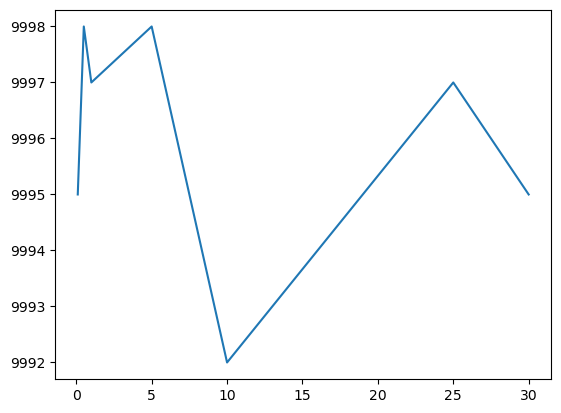

In [67]:
dimensions = 16
point_initial = [20]*dimensions
sigmas = [0.1,0.5,1,5,10,25,30]
iteration = []
for sigma in sigmas:
    #print("sigma:",sigma)
    _,bestIt = launch_ESonefifthRule(point_initial, sigma=sigma, ma_func=sphere)
    iteration.append(bestIt)
plt.plot(sigmas,iteration)

print("Terminé.")


_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-3: algorithme (mu,lambda)-ES

Vous testerez cette algorithme sur les mêmes fonction que précédemment. 

La méthode (*mu*,*lambda*) est une généralisation de la méthode (1+1) vue précédemment (qu'on peut noter aussi (*mu*=1 + *lambda*=1). Etant donnée une population d'individus, il s'agit de prendre les *mu* meilleurs, puis de créer *lambda* enfants. Chaque enfant aura pour parent l'un des *mu* parents (sélectionné au hasard). La population à la génération suivante sera constituée uniquement des *lambda* enfants ainsi construits (contrairement à la méthode (*mu*+*lambda*) ou les *mu* parents sont aussi copiés vers la génération suivante). 

Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma. 

Vous prendrez pour commencer *mu*=5 et *lambda*=10. Comme point de départ, vous utiliserez une population initiale de *lambda* invididus générés au hasard (plutôt qu'un seul individu, comme c'était le cas précédemment).


In [68]:
def launch_LambdaES(popInit, _mu, _lambda, sigma, nbeval=10000, display=True, ma_func=sphere):
  population = np.array(popInit)
  dim = len(population[0])
  population_fit = np.array([ma_func(ind) for ind in population])
  best_fit = np.min(population_fit)
  best_it = 0
  i=0
  while i < nbeval:
    # select mu parents
    parents = population[np.argsort(population_fit)[:_mu]]
    # create lambda children
    offspring = np.array([parents[np.random.randint(0,_mu)] + sigma * np.random.normal(size=dim) for _ in range(_lambda)])
    # build new population, the new population contains only lambda individuals
    population = offspring
    population_fit = np.array([ma_func(ind) for ind in population])
    # update best fit
    if np.min(population_fit) < best_fit:
      best_fit = np.min(population_fit)
      best_it = i
    i+=_lambda
  print ("Best fit",best_fit,"at iteration",best_it)
  return best_fit, best_it

print ("Terminé.")

Terminé.


Best fit 0.03710345770093476 at iteration 8536
Best fit 0.7670264597477582 at iteration 1253
Best fit 3.203764516458863 at iteration 7452
Best fit 88.21012926745217 at iteration 5438
Best fit 325.25155273470574 at iteration 9022
Best fit 2021.3043927897802 at iteration 4537
Best fit 3418.2153938347064 at iteration 5021


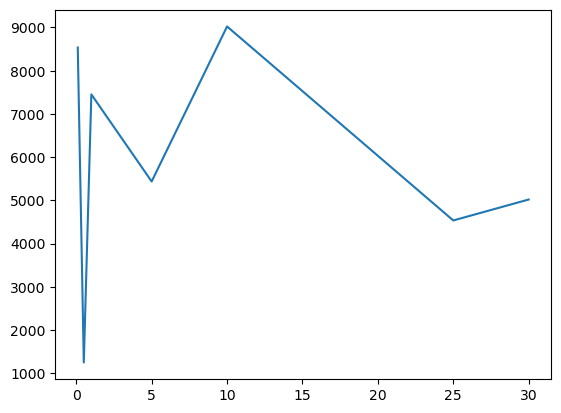

In [69]:
dimensions = 16
point_initial = [20]*dimensions
sigmas = [0.1,0.5,1,5,10,25,30]
iteration = []
for sigma in sigmas:
    #print("sigma:",sigma)
    _,bestIt = launch_LambdaES([point_initial]*100, 10, 100, sigma=sigma, ma_func=sphere)
    iteration.append(bestIt)
plt.plot(sigmas,iteration)


_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-4: stabilité des algorithmes d'optimisation stochastique

Vous allez maintenant comparer l'aspect stochastique de ces algorithmes. Pour cela, observez le code ci-dessous, qui affiche le résultat de plusieurs exécutions du même algorithme de recherche aléatoire sous forme de violin graph. Utilisez la fonction Sphere, tester aussi avec la fonction Rastrigin. 


Best fit 767.149575875634 at iteration 62
Best fit 727.3951193867773 at iteration 516
Best fit 661.1963564022478 at iteration 225
Best fit 864.5259457503829 at iteration 646
Best fit 756.7406509385227 at iteration 531
Best fit 697.7455084091877 at iteration 138
Best fit 610.6510449384382 at iteration 583
Best fit 791.197793689653 at iteration 248
Best fit 915.1231624250918 at iteration 789
Best fit 851.2745300180397 at iteration 925
Best fit 642.3224929879083 at iteration 952
Best fit 576.3856882224671 at iteration 919
Best fit 716.8551387650149 at iteration 133
Best fit 765.9242322056792 at iteration 823
Best fit 749.2510297028255 at iteration 908
Best fit 817.0455339596751 at iteration 310
Best fit 950.1998927556618 at iteration 895
Best fit 757.2369278182496 at iteration 420
Best fit 724.3157224233737 at iteration 563
Best fit 863.0168838940853 at iteration 483
Best fit 870.684836455471 at iteration 90
Best fit 730.6039583460107 at iteration 390
Best fit 630.4479834465153 at iterati

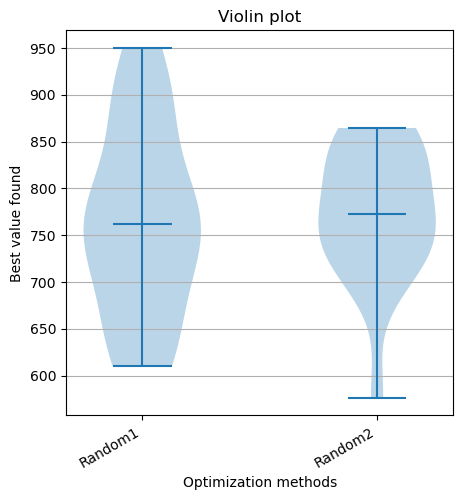

Terminé.


In [70]:
# fourni a titre d'exemple, ne pas modifier -- répondre dans la cellule suivante.

resRandom1 = []
resRandom2 = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = sphere

for i in range(20):
    resRandom1.append ( launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc) )
    resRandom2.append ( launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc) )    
    
allResults = {"Random1":resRandom1,"Random2":resRandom2}

plot_violin( allResults )

print ("Terminé.")


Testez la robustesse des algorithmes (1+1)-ES simple et (1+1)-ES règle des 1/5e sur plusieurs exécutions sur ces deux fonctions. Vous pouvez ré-utiliser le code des cellules précédentes pour afficher le résultat de plusieurs exécutions de l'algorithme (ex.: 5 exécutions).

Best fit 7.461969681210817 at iteration 394
Best fit 8.065663831520515 at iteration 909
Best fit 10.07382544126887 at iteration 942
Best fit 7.360053775660193 at iteration 741
Best fit 8.309969939899062 at iteration 862
Best fit 11.142086463653746 at iteration 972
Best fit 5.0424869283448555 at iteration 892
Best fit 7.475887022813798 at iteration 803
Best fit 9.610313750915395 at iteration 586
Best fit 6.326086664621069 at iteration 750
Best fit 5.022754021425314 at iteration 598
Best fit 8.955758769021577 at iteration 817
Best fit 5.2820752706289165 at iteration 639
Best fit 8.571935314692514 at iteration 801
Best fit 7.287366811547602 at iteration 680
Best fit 8.49832477406106 at iteration 988
Best fit 6.074877103694902 at iteration 898
Best fit 10.014891844078937 at iteration 807
Best fit 5.908227760595553 at iteration 796
Best fit 7.521625074349059 at iteration 563
Best fit 7.798070904269374 at iteration 642
Best fit 4.343075222277316 at iteration 820
Best fit 10.21869278232666 at

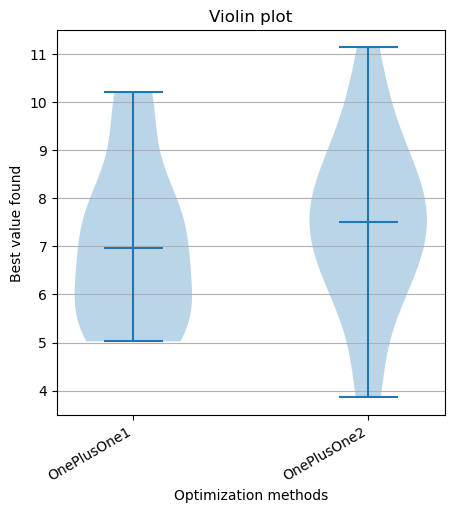

Terminé.


In [77]:
# 1,1
resOnePlusOne1 = []
resOnePlusOne2 = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = sphere
sigma = 1

for i in range(20):
    resOnePlusOne1.append ( launch_oneplusone(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)[0] )
    resOnePlusOne2.append ( launch_oneplusone(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)[0] )

allResults = {"OnePlusOne1":resOnePlusOne1,"OnePlusOne2":resOnePlusOne2}

plot_violin( allResults )

print ("Terminé.")

2.000 4.000 3.364 2.828 2.378 4.757 4.000 8.000 6.727 5.657 11.314 9.514 8.000 6.727 5.657 4.757 4.000 3.364 2.828 5.657 11.314 9.514 8.000 6.727 5.657 4.757 4.000 8.000 6.727 13.454 11.314 9.514 8.000 16.000 13.454 11.314 9.514 8.000 6.727 5.657 4.757 4.000 3.364 6.727 5.657 4.757 4.000 8.000 6.727 5.657 11.314 9.514 8.000 6.727 5.657 4.757 4.000 8.000 6.727 5.657 4.757 4.000 3.364 2.828 5.657 4.757 4.000 3.364 2.828 2.378 4.757 4.000 8.000 6.727 5.657 4.757 4.000 3.364 2.828 2.378 2.000 1.682 1.414 1.189 1.000 0.841 1.682 1.414 2.828 2.378 4.757 4.000 3.364 2.828 5.657 4.757 9.514 8.000 6.727 5.657 11.314 9.514 8.000 6.727 5.657 11.314 9.514 8.000 16.000 13.454 11.314 9.514 8.000 6.727 5.657 4.757 4.000 3.364 2.828 5.657 4.757 4.000 3.364 2.828 2.378 2.000 4.000 3.364 2.828 5.657 4.757 4.000 3.364 2.828 2.378 2.000 1.682 1.414 1.189 1.000 2.000 4.000 3.364 2.828 2.378 2.000 1.682 3.364 2.828 2.378 2.000 1.682 3.364 2.828 2.378 2.000 1.682 1.414 2.828 2.378 2.000 1.682 1.414 1.189 1.0

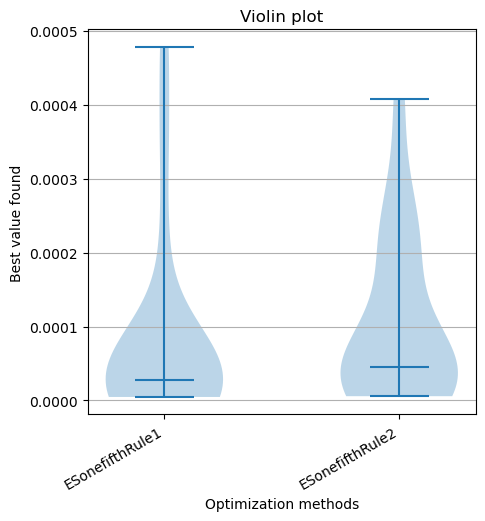

Terminé.


In [80]:
# 1/5
resESonefifthRule1 = []
resESonefifthRule2 = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = sphere
sigma = 1

for i in range(20):
    resESonefifthRule1.append ( launch_ESonefifthRule(centerInit,sigma,nbeval=evaluationBudget,ma_func=evalFunc)[0] )
    resESonefifthRule2.append ( launch_ESonefifthRule(centerInit,sigma,nbeval=evaluationBudget,ma_func=evalFunc)[0] )

allResults = {"ESonefifthRule1":resESonefifthRule1,"ESonefifthRule2":resESonefifthRule2}

plot_violin( allResults )

print ("Terminé.")

_inclure ici quelques commentaires sur vos résultats_

# Exercice A-5: comparaison entre les algorithmes

 Vous allez maintenant comparer tous les algorithmes précédents en traçant les résultat sur une même figure. Sur la même figure, vous tracerez aussi les résultats de deux méthodes classiques d'optimisation: Nelder-Mead et Powell.  Vous pouvez tout écrire dans la cellule ci-dessous.

_Remarque: Pour que les comparaisons soient équitables, il faut que les points de départ des optimisation "classiques" soient similaires. Vous pourrez éventuellement ajouter un diagramme représentant le nombre d'évaluation par méthode._

Best fit 5.349300215402117 at iteration 760
0.841 1.682 1.414 1.189 1.000 0.841 1.682 1.414 1.189 1.000 0.841 0.707 0.595 1.189 2.378 2.000 4.000 8.000 6.727 5.657 4.757 4.000 3.364 2.828 2.378 4.757 9.514 19.027 16.000 13.454 11.314 9.514 8.000 6.727 5.657 4.757 4.000 3.364 2.828 2.378 2.000 4.000 3.364 2.828 5.657 4.757 4.000 3.364 2.828 2.378 2.000 1.682 1.414 2.828 2.378 2.000 4.000 3.364 2.828 2.378 2.000 4.000 3.364 6.727 13.454 11.314 9.514 8.000 6.727 5.657 4.757 4.000 3.364 2.828 2.378 2.000 4.000 3.364 6.727 13.454 11.314 9.514 8.000 6.727 5.657 4.757 9.514 8.000 6.727 5.657 4.757 9.514 8.000 6.727 5.657 11.314 9.514 8.000 6.727 5.657 4.757 4.000 3.364 6.727 5.657 4.757 4.000 3.364 6.727 5.657 4.757 4.000 3.364 2.828 2.378 4.757 9.514 8.000 6.727 5.657 4.757 4.000 3.364 2.828 2.378 2.000 1.682 1.414 1.189 1.000 2.000 1.682 1.414 1.189 2.378 2.000 1.682 1.414 1.189 2.378 4.757 4.000 8.000 6.727 5.657 4.757 4.000 3.364 2.828 2.378 4.757 9.514 8.000 6.727 5.657 11.314 9.514 8.00

/var/folders/rg/dd7xvnms5q72qf02psgkl7400000gn/T/ipykernel_16600/397999826.py:2: OptimizeWarning: Unknown solver options: xtol
  nelder = minimize(ma_func, center, method='nelder-mead',options={'xtol': 1e-8, 'disp': display})


0.011 0.009 0.008 0.007 0.006 0.011 0.009 0.008 0.007 0.006 0.005 0.004 0.003 0.003 0.006 0.005 0.009 0.019 0.016 0.013 0.011 0.009 0.008 0.007 0.013 0.011 0.009 0.008 0.016 0.013 0.026 0.022 0.019 0.016 0.013 0.011 0.009 0.019 0.016 0.013 0.011 0.022 0.019 0.016 0.013 0.011 0.009 0.008 0.007 0.013 0.011 0.009 0.008 0.007 0.006 0.011 0.009 0.019 0.016 0.013 0.011 0.009 0.008 0.007 0.006 0.005 0.004 0.008 0.007 0.006 0.005 0.009 0.008 0.007 0.006 0.005 0.009 0.008 0.007 0.006 0.005 0.004 0.003 0.007 0.006 0.005 0.009 0.008 0.007 0.013 0.011 0.009 0.008 0.007 0.006 0.005 0.004 0.003 0.007 0.013 0.011 0.009 0.008 0.016 0.013 0.011 0.009 0.008 0.007 0.006 0.011 0.009 0.008 0.016 0.013 0.026 0.022 0.019 0.016 0.013 0.011 0.009 0.008 0.007 0.006 0.005 0.004 0.008 0.007 0.006 0.005 0.004 0.008 0.007 0.013 0.026 0.022 0.019 0.016 0.013 0.011 0.009 0.008 0.007 0.006 0.011 0.009 0.008 0.007 0.006 0.011 0.009 0.019 0.016 0.013 0.011 0.009 0.008 0.007 0.006 
Best fit 0.002983758238515781 at iterat

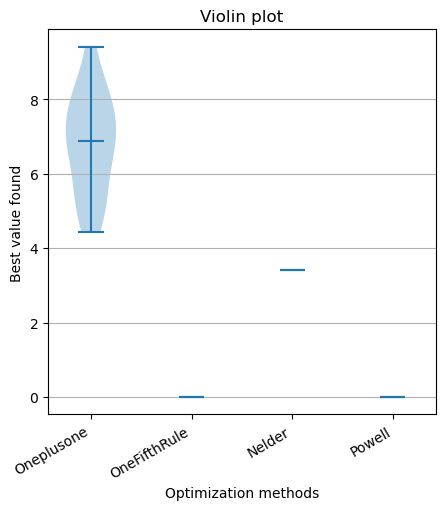

Terminé.


In [83]:
def launch_nelder(center, nbeval=10000, display=False, ma_func=sphere):
    nelder = minimize(ma_func, center, method='nelder-mead',options={'xtol': 1e-8, 'disp': display})
    return nelder.fun

def launch_powell(center, nbeval=10000, display=False, ma_func=sphere):
    powell = minimize(ma_func, center, method='powell',options={'xtol': 1e-8, 'disp': display})
    return powell.fun

resOneplusone = []
# resRandom = []
resOneFifthRule = []
resNelder = []
resPowell = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = sphere
sigma = 1

for i in range(20):
    resOneplusone.append ( launch_oneplusone(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)[0] )
    # resRandom.append ( launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc) )
    resOneFifthRule.append ( launch_ESonefifthRule(centerInit,sigma,nbeval=evaluationBudget,ma_func=evalFunc)[0] )
    resNelder.append ( launch_nelder(centerInit,display=False,ma_func=evalFunc) )
    resPowell.append ( launch_powell(centerInit,display=False,ma_func=evalFunc) )

allResults = {"Oneplusone":resOneplusone,"OneFifthRule":resOneFifthRule,"Nelder":resNelder,"Powell":resPowell}

plot_violin( allResults )

print ("Terminé.")

_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-6: algorithme CEM

Nous allons maintenant implémenter l'algorithme Cross Entropy Method (CEM)

Vous utiliserez pour cela l'algorithme tel qu'il a présenté en cours (cf. slides), et le pseudo-code disponible sur [wikipedia](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_l%27entropie_crois%C3%A9e#Pseudo-code)

Vous testerez cet algorithme sur les mêmes fonctions que précédemment. De même que précédemment, vous tracerez l'évolution de la population pour chaque exécution. 

Vous étudierez l'impact du choix du point initial et du sigma. Vous comparerez également la version complète avec la version pureCMA, qui n'inclut pas certains mécanismes comme le restart. 

In [86]:
def launch_CEM(center, sigma, nbeval=10000, display=True, ma_func=sphere):
    # Initialize parameters
    μ = np.mean(center)
    σ2 = sigma ** 2
    t = 0
    N = 100
    Ne = 10
    ε = 1e-8

    # While maxits not exceeded and not converged
    while t < nbeval and σ2 > ε:
        # Obtain N samples from current sampling distribution
        X = np.random.normal(μ, np.sqrt(σ2), size=N)

        # Evaluate objective function at sampled points
        S = ma_func(X)

        # Sort X by objective function values in descending order
        X = X[np.argsort(-S)]

        # Update parameters of sampling distribution                  
        μ = np.mean(X[:Ne])
        σ2 = np.var(X[:Ne])

        t += 1

    # Return mean of final sampling distribution as solution
    return μ


_inclure ici quelques commentaires sur vos résultats_

Reprenez l'exercice 5 pour ajouter CEM sur le graphe.

Best fit 5.579116313517735 at iteration 536
0.841 1.682 1.414 2.828 2.378 2.000 1.682 3.364 2.828 2.378 2.000 4.000 3.364 2.828 5.657 11.314 9.514 8.000 6.727 5.657 4.757 4.000 8.000 6.727 5.657 11.314 9.514 8.000 6.727 13.454 11.314 22.627 19.027 16.000 13.454 11.314 9.514 8.000 16.000 13.454 11.314 9.514 8.000 6.727 5.657 4.757 9.514 8.000 6.727 5.657 4.757 4.000 3.364 6.727 5.657 11.314 9.514 8.000 6.727 5.657 4.757 4.000 3.364 2.828 2.378 2.000 4.000 3.364 6.727 5.657 4.757 4.000 3.364 2.828 2.378 4.757 4.000 3.364 6.727 5.657 4.757 4.000 3.364 2.828 2.378 4.757 4.000 3.364 6.727 5.657 4.757 4.000 8.000 6.727 5.657 4.757 4.000 3.364 2.828 5.657 4.757 4.000 3.364 2.828 2.378 4.757 4.000 3.364 2.828 2.378 2.000 4.000 3.364 2.828 2.378 2.000 1.682 3.364 2.828 2.378 2.000 1.682 1.414 1.189 1.000 0.841 1.682 1.414 1.189 2.378 2.000 1.682 3.364 2.828 2.378 4.757 4.000 3.364 2.828 2.378 2.000 1.682 1.414 1.189 1.000 2.000 1.682 1.414 2.828 2.378 4.757 4.000 3.364 6.727 5.657 4.757 4.000 3

/var/folders/rg/dd7xvnms5q72qf02psgkl7400000gn/T/ipykernel_16600/3450893057.py:2: OptimizeWarning: Unknown solver options: xtol
  nelder = minimize(ma_func, center, method='nelder-mead',options={'xtol': 1e-8, 'disp': display})


0.053 0.044 0.088 0.074 0.062 0.053 0.044 0.037 0.031 0.026 0.022 0.019 0.037 0.074 0.149 0.125 0.105 0.088 0.074 0.062 0.053 0.044 0.037 0.031 0.026 0.022 0.044 0.037 0.031 0.062 0.125 0.105 0.088 0.074 0.062 0.053 0.044 0.037 0.031 0.062 0.053 0.044 0.037 0.031 0.062 0.053 0.044 0.037 0.031 0.026 0.053 0.044 0.037 0.031 0.026 0.022 0.019 0.016 0.013 0.026 0.053 0.044 0.037 0.031 0.026 0.022 0.019 0.016 0.013 0.026 0.022 0.019 0.037 0.031 0.026 0.053 0.044 0.037 0.031 0.062 0.053 0.044 0.037 0.031 0.026 0.053 0.044 0.037 0.031 0.026 0.022 0.044 0.037 0.031 0.026 0.022 0.019 0.016 0.031 0.026 0.053 0.044 0.037 0.031 0.026 0.053 0.044 0.037 0.074 0.062 0.053 0.044 0.037 0.031 0.062 0.053 0.044 0.037 0.031 0.062 0.125 0.105 0.088 0.074 0.062 0.053 0.044 0.037 0.031 0.026 0.022 0.044 0.037 0.031 0.062 0.053 0.044 0.037 0.031 0.026 0.022 0.044 0.037 0.031 0.026 0.022 0.044 0.037 0.031 0.026 0.022 0.044 0.037 0.031 0.026 0.022 0.019 0.016 0.013 0.011 0.009 0.019 0.016 0.013 0.011 0.009 0.00

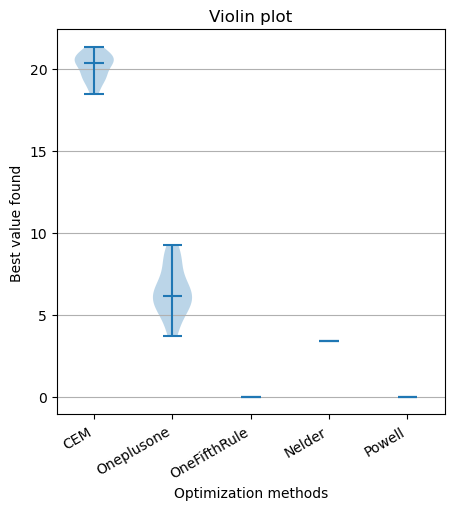

Terminé.


In [87]:
def launch_nelder(center, nbeval=10000, display=False, ma_func=sphere):
    nelder = minimize(ma_func, center, method='nelder-mead',options={'xtol': 1e-8, 'disp': display})
    return nelder.fun

def launch_powell(center, nbeval=10000, display=False, ma_func=sphere):
    powell = minimize(ma_func, center, method='powell',options={'xtol': 1e-8, 'disp': display})
    return powell.fun

resCEM = []
resOneplusone = []
resOneFifthRule = []
resNelder = []
resPowell = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = sphere
sigma = 1

for i in range(20):
    resCEM.append ( launch_CEM(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc) )
    resOneplusone.append ( launch_oneplusone(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)[0] )
    resOneFifthRule.append ( launch_ESonefifthRule(centerInit,sigma,nbeval=evaluationBudget,ma_func=evalFunc)[0] )
    resNelder.append ( launch_nelder(centerInit,display=False,ma_func=evalFunc) )
    resPowell.append ( launch_powell(centerInit,display=False,ma_func=evalFunc) )

allResults = {"CEM":resCEM,"Oneplusone":resOneplusone,"OneFifthRule":resOneFifthRule,"Nelder":resNelder,"Powell":resPowell}

plot_violin( allResults )

print ("Terminé.")

_inclure ici quelques commentaires sur vos résultats_

Modifiez CEM pour que l'amplitude de la mutation (i.e. *sigma*) diminue au cours du temps. La vitesse à laquelle diminue ce taux est fixe. Cela permet d'éviter le bruit dû à la mutation qui peu géner la conférence en fin d'optimisation.

In [ ]:
# à compléter

_inclure ici quelques commentaires sur vos résultats_

---
---
---

# <font color='orange'>PARTIE B: optimisation d'un pendule inversé</font>

OpenAI Gym (https://gym.openai.com/) est un framework permettant de lancer facilement des expériences d'apprentissage par renforcement. Nous allons l'utiliser pour tester les algorithmes évolutionnistes. Pour cet exercice, vous êtes laissé en autonomie: vous devez donc lire attentivement la documentation et les exemples.

# Importation des librairies et définition des fonctions utiles pour la partie B

Remarque: *Il est nécessaire d'exécuter ces cellules une seule fois. En cas de redémarrage du noyau, il faut relancer ces cellules. Il n'est pas nécessaire de regarder le code de ces cellules, elles servent seulement de soutien à la partie B.*

In [1]:
# source: https://colab.research.google.com/drive/124koV4mf1tQ4av9jAJJuWsyuhJyLyd70#scrollTo=G9UWeToN4r7D

#remove " > /dev/null 2>&1" to see what is going on under the hood
# !pip install pyvirtualdisplay > /dev/null 2>&1
# !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

# !apt-get update > /dev/null 2>&1
# !apt-get install cmake > /dev/null 2>&1
# !pip install --upgrade setuptools 2>&1
# !pip install ez_setup > /dev/null 2>&1
# !pip install gym[atari] > /dev/null 2>&1

# !pip install gym[classic_control] > /dev/null 2>&1 
# for pygame

from datetime import datetime
from datetime import date

import base64
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

import gym
from gym import logger as gymlogger
# from gym.wrappers import Monitor # deprecated 2023 - https://stackoverflow.com/questions/71520568/importerror-cannot-import-name-monitor-from-gym-wrappers
from gym.wrappers.record_video import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-09 17:49:22 GMT
OK.


In [2]:
# source: https://colab.research.google.com/drive/124koV4mf1tQ4av9jAJJuWsyuhJyLyd70#scrollTo=G9UWeToN4r7D
# modification mineur: ajout de l'argument loop dans la fonction show_video(loop=True)

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video(loop=True):
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    if loop == True:
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True) # !!! 2023
  env.reset() # !!! 2023
  #env = Monitor(env, './video', force=True)
  return env

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-09 17:49:24 GMT
OK.


In [3]:
# A simple neural network object
# source: https://github.com/AsmaBRZ/Evolutionary-algorithms/blob/master/fixed_structure_nn_numpy.py

# coding: utf-8

import numpy as np

## Suppress TF info messages

import os

def sigmoid(x):
    return 1./(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)


def gen_simplemlp(n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5):
    n_neurons = [n_neurons_per_hidden]*n_hidden_layers if np.isscalar(n_neurons_per_hidden) else n_neurons_per_hidden
    i = Input(shape=(n_in,))
    x = i
    for n in n_neurons:
        x = Dense(n, activation='sigmoid')(x)
    o = Dense(n_out, activation='tanh')(x)
    m = Model(inputs=i, outputs=o)
    return m
    

class SimpleNeuralControllerNumpy():
    def __init__(self, n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5, params=None):
        self.dim_in = n_in
        self.dim_out = n_out
        # if params is provided, we look for the number of hidden layers and neuron per layer into that parameter (a dicttionary)
        if (not params==None):
            if ("n_hidden_layers" in params.keys()):
                n_hidden_layers=params["n_hidden_layers"]
            if ("n_neurons_per_hidden" in params.keys()):
                n_neurons_per_hidden=params["n_neurons_per_hidden"]
        self.n_per_hidden = n_neurons_per_hidden
        self.n_hidden_layers = n_hidden_layers
        self.weights = None 
        self.n_weights = None
        self.init_random_params()
        self.out = np.zeros(n_out)
        #print("Creating a simple mlp with %d inputs, %d outputs, %d hidden layers and %d neurons per layer"%(n_in, n_out,n_hidden_layers, n_neurons_per_hidden))

    
    def init_random_params(self):
        if(self.n_hidden_layers > 0):
            self.weights = [np.random.random((self.dim_in,self.n_per_hidden))] # In -> first hidden
            self.bias = [np.random.random(self.n_per_hidden)] # In -> first hidden
            for i in range(self.n_hidden_layers-1): # Hidden -> hidden
                self.weights.append(np.random.random((self.n_per_hidden,self.n_per_hidden)))
                self.bias.append(np.random.random(self.n_per_hidden))
            self.weights.append(np.random.random((self.n_per_hidden,self.dim_out))) # -> last hidden -> out
            self.bias.append(np.random.random(self.dim_out))
        else:
            self.weights = [np.random.random((self.dim_in,self.dim_out))] # Single-layer perceptron
            self.bias = [np.random.random(self.dim_out)]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])

    def get_parameters(self):
        """
        Returns all network parameters as a single array
        """
        flat_weights = np.hstack([arr.flatten() for arr in (self.weights+self.bias)])
        return flat_weights

    def set_parameters(self, flat_parameters):
        """
        Set all network parameters from a single array
        """
        i = 0 # index
        to_set = []
        self.weights = list()
        self.bias = list()
        if(self.n_hidden_layers > 0):
            # In -> first hidden
            w0 = np.array(flat_parameters[i:(i+self.dim_in*self.n_per_hidden)])
            self.weights.append(w0.reshape(self.dim_in,self.n_per_hidden))
            i += self.dim_in*self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                w = np.array(flat_parameters[i:(i+self.n_per_hidden*self.n_per_hidden)])
                self.weights.append(w.reshape((self.n_per_hidden,self.n_per_hidden)))
                i += self.n_per_hidden*self.n_per_hidden
            # -> last hidden -> out
            wN = np.array(flat_parameters[i:(i+self.n_per_hidden*self.dim_out)])
            self.weights.append(wN.reshape((self.n_per_hidden,self.dim_out)))
            i += self.n_per_hidden*self.dim_out
            # Samefor bias now
            # In -> first hidden
            b0 = np.array(flat_parameters[i:(i+self.n_per_hidden)])
            self.bias.append(b0)
            i += self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                b = np.array(flat_parameters[i:(i+self.n_per_hidden)])
                self.bias.append(b)
                i += self.n_per_hidden
            # -> last hidden -> out
            bN = np.array(flat_parameters[i:(i+self.dim_out)])
            self.bias.append(bN)
            i += self.dim_out
        else:
            n_w = self.dim_in*self.dim_out
            w = np.array(flat_parameters[:n_w])
            self.weights = [w.reshape((self.dim_in,self.dim_out))]
            self.bias = [np.array(flat_parameters[n_w:])]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])
    
    def predict(self,x):
        """
        Propagate
        """
        if(self.n_hidden_layers > 0):
            #Input
            a = np.matmul(x,self.weights[0]) + self.bias[0]
            y = sigmoid(a)
            # hidden -> hidden
            for i in range(1,self.n_hidden_layers-1):
                a = np.matmul(y, self.weights[i]) + self.bias[i]
                y = sigmoid(a)
            # Out
            a = np.matmul(y, self.weights[-1]) + self.bias[-1]
            out = tanh(a)
            return out
        else: # Simple monolayer perceptron
            return tanh(np.matmul(x,self.weights[0]) + self.bias[0])

    def __call__(self,x):
        """Calling the controller calls predict"""
        return self.predict(x)

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-09 17:49:26 GMT
OK.


---

# Question B-0: simulation du pendule inversé

Le code ci-dessous montre comment lancer la simulation d'un pendule inversé en utilisant OpenAI Gym. Etudiez-le et exécutez-le.



In [6]:
import gym
env = gym.make('CartPole-v1')
# env = wrap_env( gym.make('CartPole-v1') ) # colab-specific # needs py-game (import in earlier cell)

observation = env.reset()

#for _ in range(1000):
#while True:
maxEvaluations = 10
evaluation = 0
while evaluation < maxEvaluations:
    env.render()
    action = env.action_space.sample() 
    observation, reward, done, info = env.step(action) 

    if done:
      evaluation = evaluation + 1
      observation = env.reset()
      print ("obs:",observation,type(observation),observation.shape)
      #show_video(False) # colab-specific

env.close()

# show_video() # colab-specific

obs: [ 0.03655852 -0.0379451  -0.03507857  0.00063122] <class 'numpy.ndarray'> (4,)
obs: [-0.02670262  0.02918386  0.03364529  0.00497532] <class 'numpy.ndarray'> (4,)
obs: [-0.0215275   0.02070146  0.0397289  -0.03035651] <class 'numpy.ndarray'> (4,)
obs: [-0.02339732  0.04186918  0.00564908 -0.02587337] <class 'numpy.ndarray'> (4,)
obs: [ 0.01687483 -0.00953075 -0.01630541 -0.04672898] <class 'numpy.ndarray'> (4,)
obs: [ 0.01798375  0.04951905 -0.02749237 -0.01281472] <class 'numpy.ndarray'> (4,)
obs: [-0.01201824  0.02357562  0.00127245  0.00378736] <class 'numpy.ndarray'> (4,)
obs: [ 0.00447161 -0.00980276  0.01651254  0.02481362] <class 'numpy.ndarray'> (4,)
obs: [ 0.0364054   0.00348558  0.01759133 -0.04941295] <class 'numpy.ndarray'> (4,)
obs: [0.00769831 0.0304377  0.00389253 0.03596073] <class 'numpy.ndarray'> (4,)


: 

# Question B-1

En partant de l'exemple de la documentation et du code fourni pour le réseau de neurones dans la première cellule ci-dessous, faites une expérience pour optimiser les paramètres d'un réseau de neurones contrôlant un pendule inversé (environnement 'CartPole-v1') avec CMA-ES. Imposez une limite à 500 pas de temps au-delà de laquelle l'expérience est considérée comme réussie. 

In [5]:
# Exemple de création d'un réseau de neurones multi-couches ("multi-layered perceptron")

nbInputs = 4
nbOutputs = 1
nbHiddenLayers = 2
nbNeuronsPerLayer = 5

nn=SimpleNeuralControllerNumpy(nbInputs,nbOutputs,nbHiddenLayers,nbNeuronsPerLayer) 

# NN parameters

theta = nn.get_parameters() # get default parameters
for i in range(len(theta)):
  theta[i] = random.random()*2.0-1.0 # set our own parameter values
nn.set_parameters(theta)
print ("NN parameters:",theta)

# running NN

observation = np.array( [ -0.03760372,0.00724161,-0.03663132,0.01225319 ], np.float64 )

print ("Input values:", observation)

outputValues = nn.predict(observation)

print ("Output values:", outputValues)


NN parameters: [-0.56932893  0.82692653  0.30463184 -0.94305596 -0.60668857  0.97510964
 -0.60381049  0.42694704 -0.97444464  0.71764892  0.86388259  0.46801273
  0.72799304  0.95048435  0.04305086  0.33704509 -0.243423    0.97396639
 -0.0668897  -0.87492459  0.71415584  0.36888237 -0.61361341  0.14465565
 -0.63856188 -0.52133883 -0.04907486 -0.39323968 -0.66958373 -0.88027185
  0.1745132  -0.11035171 -0.71401853  0.43377797  0.52156816 -0.28492035
  0.59566824  0.66927163  0.02447647 -0.84666154  0.88274863  0.85599069
  0.50458506 -0.64970217 -0.25075762  0.16560007 -0.05832641 -0.60645955
  0.71755742 -0.33052835  0.38063895  0.09921735 -0.14982917 -0.2183752
  0.20193514 -0.57424508  0.91224118 -0.01355412  0.03882424  0.86151776
  0.20477226]
Input values: [-0.03760372  0.00724161 -0.03663132  0.01225319]
Output values: [0.13085066]


In [ ]:
# A compléter 

_inclure ici quelques commentaires sur vos résultats_

--- 

# Question B-2

Re-calculez plusieurs fois la fitness du meilleur contrôleur généré. Visualisez les comportements correspondants. Que constatez-vous ? Quel est le problème ? Proposez une solution pour le résoudre.

In [ ]:
# A compléter

_inclure ici quelques commentaires sur vos résultats_

---
---
---

# <font color='orange'>PARTIE C: exercices bonus</font>

Si vous avez fini tout le reste... A faire en complète autonomie.


# Question C-1: 

A partir de l'implémentation (1+lambda)-ES, implémenter (1) un algorithme (1,lambda)-ES, puis (mu+lambda)-ES et (mu,lambda)-ES. Etudiez l'influence des valeurs de mu et lambda.


In [ ]:
# A compléter

# Question C-2: 

Comparez l'algorithme CMA-ES avec les algorithmes précédents. Pour cela, importez et utilisez une implémentation existante (par exemple celle proposée dans DEAP: https://deap.readthedocs.io/en/master/examples/cmaes.html)

In [ ]:
# A compléter

# Question C-3:

A partir de l'expérience du pendule inversé, faites le même genre d'expériences avec d'autres environnement proposé dans OpenAI gym, par exemple le BipedalWalker (attention, le temps nécessaire pour l'optimisation peut rapidement devenir très long)


In [ ]:
# A compléter

*Fin du sujet.*
